<a href="https://colab.research.google.com/github/CaioDias9700/Ci-ncia-de-dados/blob/main/datatsc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caio Eduardo Dias**


**Este conjunto de dados contém informações sobre incêndios registrados nos estados brasileiros ao longo dos anos, distribuídos por mês e estado. Com um total de 6.454 registros, ele permite acompanhar a variação no número de focos de incêndio em diferentes regiões do país. A tabela é composta por cinco colunas: ano, estado, mês, número de focos de incêndio e data exata do registro.**

**A coluna "ano" indica o ano em que o incêndio foi registrado, enquanto a coluna "estado" traz o nome do estado brasileiro correspondente. A coluna "mês" especifica o mês em que os focos foram detectados, e a coluna "número" registra a quantidade de incêndios ocorridos naquele estado e mês. Por fim, a coluna "data" apresenta a data completa do registro no formato "ano-mês-dia".**

[Forest Fires in Brazil](https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/amazon.csv', encoding='latin-1')


In [ ]:
!pip install plotly
import plotly.express as px


In [ ]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [ ]:
# Agrupando por ano, estado e mês
grouped = df.groupby(['year', 'state', 'month'])['number']

# Calculando média, mediana e moda
summary = grouped.agg(['mean', 'median', lambda x: x.mode()[0]]).reset_index()
summary.columns = ['year', 'state', 'month', 'mean', 'median', 'mode']

print(summary)

      year      state      month     mean   median     mode
0     1998       Acre      Abril    0.000    0.000    0.000
1     1998       Acre     Agosto  130.000  130.000  130.000
2     1998       Acre   Dezembro    7.000    7.000    7.000
3     1998       Acre  Fevereiro    0.000    0.000    0.000
4     1998       Acre    Janeiro    0.000    0.000    0.000
...    ...        ...        ...      ...      ...      ...
5492  2017  Tocantins       Maio  576.000  576.000  576.000
5493  2017  Tocantins      Março   98.000   98.000   98.000
5494  2017  Tocantins   Novembro  434.000  434.000  434.000
5495  2017  Tocantins    Outubro    2.969    2.969    2.969
5496  2017  Tocantins   Setembro   10.737   10.737   10.737

[5497 rows x 6 columns]


In [ ]:
# Agrupar por ano
grouped_year = df.groupby('year')['number']

# Calcular média, mediana e moda
summary_year = grouped_year.agg(['mean', 'median', lambda x: x.mode()[0]]).reset_index()
summary_year.columns = ['year', 'mean', 'median', 'mode']

print(summary_year)

    year        mean  median  mode
0   1998   61.771515     1.0   0.0
1   1999   82.971670    14.0   0.0
2   2000   84.417441    15.0   0.0
3   2001   89.727198    11.5   0.0
4   2002  115.403086    18.5   0.0
5   2003  131.977389    27.0   0.0
6   2004  118.682602    22.5   0.0
7   2005  108.040015    25.0   0.0
8   2006  104.420250    23.0   0.0
9   2007  101.967324    15.0   0.0
10  2008   90.675815    25.0   0.0
11  2009  120.732031    29.0   0.0
12  2010  114.313114    32.5   0.0
13  2011  106.893657    31.0   0.0
14  2012  123.718704    41.0   0.0
15  2013  108.475673    36.5   0.0
16  2014  122.287602    46.5   0.0
17  2015  127.186086    44.5   3.0
18  2016  130.284657    42.0   1.0
19  2017  123.106121    31.5   0.0


# **Número de incêndios ao longo do tempo.**

**Os resultados mostram flutuações consideráveis no número de incêndios ao longo do tempo, com alguns anos apresentando picos acentuados. Esses picos podem estar relacionados a eventos climáticos, como o fenômeno El Niño, que provoca secas prolongadas, favorecendo a propagação de incêndios. Além disso, as variações ao longo do tempo também podem refletir mudanças nas políticas de uso da terra e práticas agrícolas. Por exemplo, anos com maior desmatamento tendem a apresentar mais incêndios, uma vez que a prática de queima controlada para a limpeza de terras pode facilmente sair do controle.**

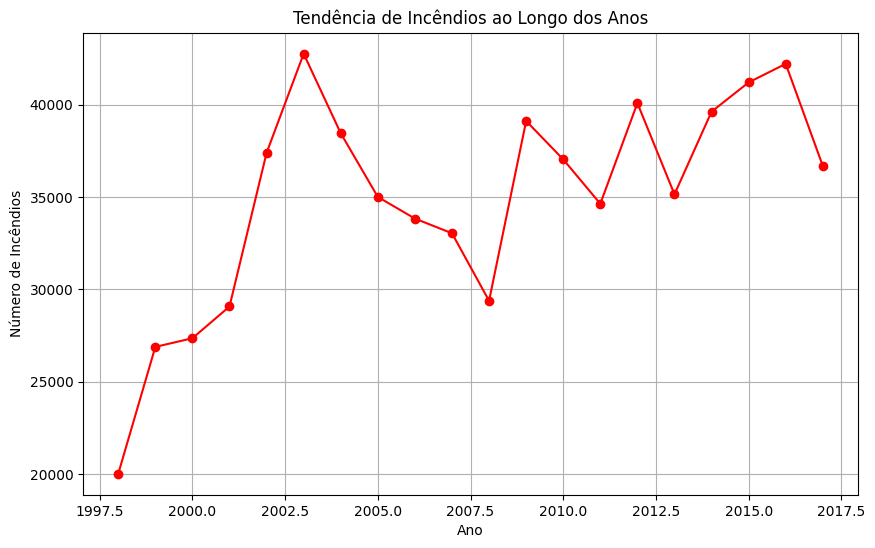

In [ ]:
import matplotlib.pyplot as plt

# Agrupar o número total de incêndios por ano
fires_per_year = df.groupby('year')['number'].sum()

# Plotar a tendência de incêndios ao longo dos anos
plt.figure(figsize=(10,6))
fires_per_year.plot(kind='line', color='r', marker='o')
plt.title('Tendência de Incêndios ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Incêndios')
plt.grid(True)
plt.show()


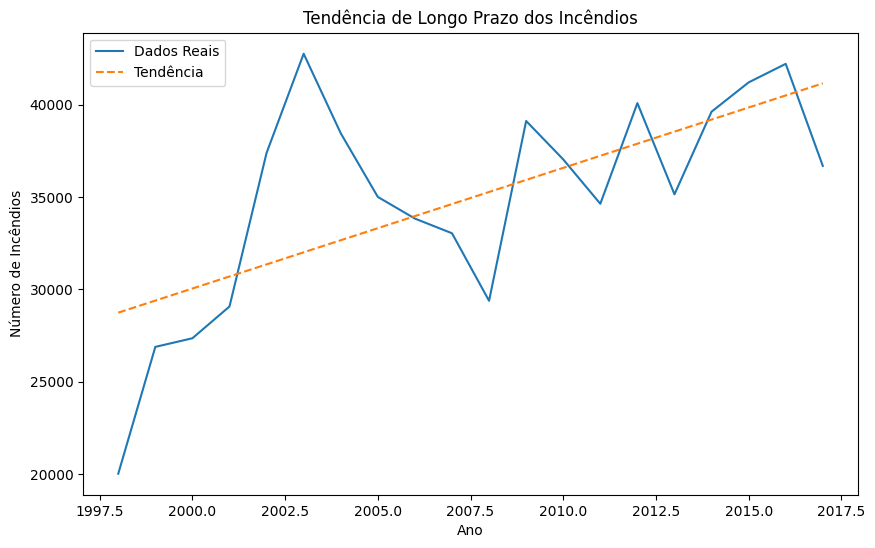

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd # import pandas for datetime conversion


# Agrupar os incêndios por ano para criar a série temporal
series = df.groupby('year')['number'].sum()

# Convert the index to DatetimeIndex if it is not already
series.index = pd.to_datetime(series.index, format='%Y')

# Preparar os dados para a regressão
X = np.array(series.index.year).reshape(-1, 1)  # Anos
y = series.values  # Número de incêndios

# Ajustar um modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazer previsões e plotar a tendência
trend = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(series.index.year, y, label='Dados Reais')
plt.plot(series.index.year, trend, label='Tendência', linestyle='--')
plt.title('Tendência de Longo Prazo dos Incêndios')
plt.xlabel('Ano')
plt.ylabel('Número de Incêndios')
plt.legend()
plt.show()


In [ ]:
# Agrupar os dados por ano e contar o número de registros
year_counts = df.groupby('year')['number'].sum()

sorted_year_counts = year_counts.sort_values(ascending=False)

print(sorted_year_counts)


year
2003    42760.674
2016    42212.229
2015    41208.292
2012    40084.860
2014    39621.183
2009    39117.178
2004    38453.163
2002    37390.600
2010    37037.449
2017    36685.624
2013    35146.118
2005    35004.965
2011    34633.545
2006    33832.161
2007    33037.413
2008    29378.964
2001    29071.612
2000    27351.251
1999    26882.821
1998    20013.971
Name: number, dtype: float64


In [ ]:
# Agrupar os dados por ano e contar o número de registros
year_counts = df.groupby('year')['number'].sum()

sorted_year_counts = year_counts.sort_values(ascending=False)

fig_bar = px.bar(sorted_year_counts, x=sorted_year_counts.index, y=sorted_year_counts.values,
             title='Anos com Mais Registros', labels={'x': 'Ano', 'y': 'Número de Registros'})
fig_bar.show()

In [ ]:
# Agrupar os dados por estado e ano, somando a coluna "number"
df_state_year = df.groupby(['state', 'year'])['number'].sum().reset_index()

fig_all_states = px.line(df_state_year, x='year', y='number', color='state',
                         title='Número de registros por anos e por estados')
fig_all_states.show()


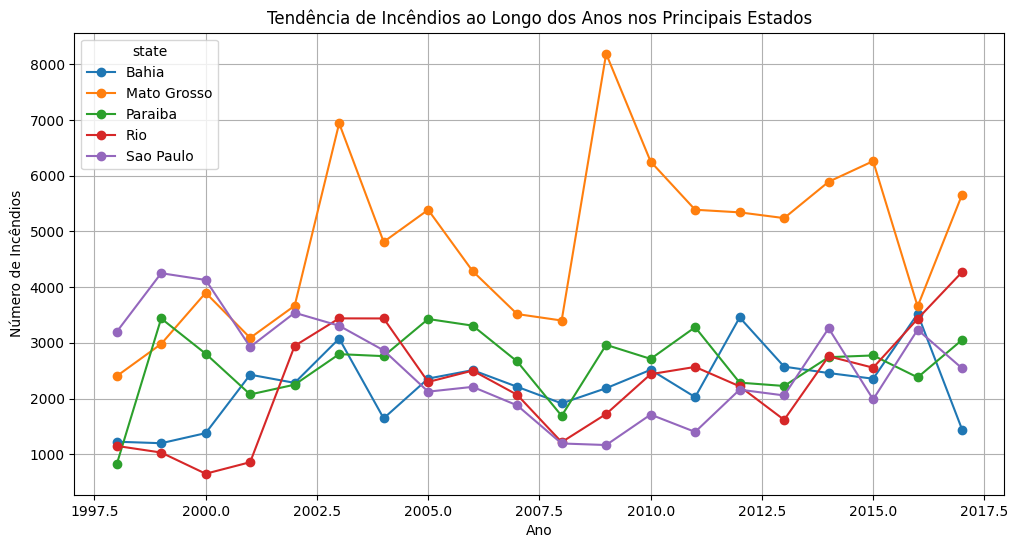

In [ ]:
# Selecionar os 5 estados com mais incêndios
top_states = df.groupby('state')['number'].sum().nlargest(5).index

# Filtrar os dados apenas para esses estados
df_top_states = df[df['state'].isin(top_states)]

# Agrupar por ano e estado
fires_by_year_state = df_top_states.groupby(['year', 'state'])['number'].sum().unstack()

# Plotar o gráfico de linha para cada estado
fires_by_year_state.plot(figsize=(12, 6), marker='o')
plt.title('Tendência de Incêndios ao Longo dos Anos nos Principais Estados')
plt.xlabel('Ano')
plt.ylabel('Número de Incêndios')
plt.grid(True)
plt.show()


In [ ]:
# Top 10 linhas com maior valor na coluna 'number'
top_10_maior = df.nlargest(10, 'number')
print("Top 10 linhas com maior valor na coluna 'number':\n", top_10_maior)

# Top 10 linhas com menor valor na coluna 'number'
top_10_menor = df.nsmallest(10, 'number')
print("\nTop 10 linhas com menor valor na coluna 'number':\n", top_10_menor)


Top 10 linhas com maior valor na coluna 'number':
       year        state     month  number        date
888   2008     Amazonas  Setembro   998.0  2008-01-01
1105  2006        Bahia    Agosto   995.0  2006-01-01
1410  2012        Ceara  Novembro   995.0  2012-01-01
6346  2009    Tocantins     Julho   989.0  2009-01-01
3745  2017      Paraiba    Agosto   987.0  2017-01-01
3229  1999         Pará     Julho   982.0  1999-01-01
6344  2007    Tocantins     Julho   982.0  2007-01-01
5896  2017    Sao Paulo    Agosto   981.0  2017-01-01
1100  2001        Bahia    Agosto   979.0  2001-01-01
2502  2009  Mato Grosso     Junho   979.0  2009-01-01

Top 10 linhas com menor valor na coluna 'number':
     year state    month  number        date
0   1998  Acre  Janeiro     0.0  1998-01-01
1   1999  Acre  Janeiro     0.0  1999-01-01
2   2000  Acre  Janeiro     0.0  2000-01-01
3   2001  Acre  Janeiro     0.0  2001-01-01
4   2002  Acre  Janeiro     0.0  2002-01-01
6   2004  Acre  Janeiro     0.0  2004-0

#**Distribuição Regional dos Incêndios**

**Ao observar a distribuição geográfica dos incêndios, identificamos que estados como Amazonas, Pará e Mato Grosso são consistentemente os mais afetados. Esses estados, localizados em regiões de intensa atividade agrícola e desmatamento, apresentam grandes áreas de floresta tropical, onde as queimadas são frequentemente utilizadas como método de preparo da terra para o cultivo. No entanto, essa prática tem consequências devastadoras para o ecossistema, uma vez que incêndios florestais de grande escala contribuem significativamente para a emissão de gases de efeito estufa e a perda de biodiversidade.**

In [ ]:
state_counts = df.groupby('state')['number'].sum()

sorted_state_counts = state_counts.sort_values()

print(sorted_state_counts)


state
Sergipe              3237.000
Distrito Federal     3561.000
Alagoas              4644.000
Espirito Santo       6546.000
Acre                18464.030
Rondonia            20285.429
Amapa               21831.576
Santa Catarina      24359.852
Roraima             24385.074
Pernambuco          24498.000
Pará                24512.144
Maranhao            25129.131
Ceara               30428.063
Amazonas            30650.129
Tocantins           33707.885
Minas Gerais        37475.258
Goias               37695.520
Piau                37803.747
Bahia               44746.226
Rio                 45160.865
Sao Paulo           51121.198
Paraiba             52435.918
Mato Grosso         96246.028
Name: number, dtype: float64


In [ ]:
# Filtra o DataFrame para incluir apenas as linhas com 'number' igual a 0
df_number_zero = df[df['number'] == 0]

# Imprime as linhas com 'number' igual a 0
print(df_number_zero)


      year      state    month  number        date
0     1998       Acre  Janeiro     0.0  1998-01-01
1     1999       Acre  Janeiro     0.0  1999-01-01
2     2000       Acre  Janeiro     0.0  2000-01-01
3     2001       Acre  Janeiro     0.0  2001-01-01
4     2002       Acre  Janeiro     0.0  2002-01-01
...    ...        ...      ...     ...         ...
6255  1998  Tocantins    Março     0.0  1998-01-01
6258  2001  Tocantins    Março     0.0  2001-01-01
6275  1998  Tocantins    Abril     0.0  1998-01-01
6277  2000  Tocantins    Abril     0.0  2000-01-01
6295  1998  Tocantins     Maio     0.0  1998-01-01

[617 rows x 5 columns]


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
import os
import requests

# URL do shapefile dos estados brasileiros (IBGE)
url = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_UF_2021.zip"

# Baixar o arquivo ZIP
r = requests.get(url)
with open("estados_brasil.zip", "wb") as f:
    f.write(r.content)

# Descompactar o arquivo ZIP
with zipfile.ZipFile("estados_brasil.zip", 'r') as zip_ref:
    zip_ref.extractall("estados_brasil")

# Encontrar o arquivo shapefile dentro da pasta descompactada
shapefile_path = ""
for root, dirs, files in os.walk("estados_brasil"):
    for file in files:
        if file.endswith(".shp"):
            shapefile_path = os.path.join(root, file)

mapa_brasil = gpd.read_file(shapefile_path)

In [ ]:
mapeamento_nomes = {
    'Espírito Santo': 'Espirito Santo',
    'Amapá':'Amapa',
    'Rondônia':'Rondonia',
    'Ceará':'Ceara',
    'Goiás':'Goias',
    'Maranhão':'Maranhao',
    'Paraíba':'Paraiba',
    'Rio de Janeiro':'Rio',
    'São Paulo':'Sao Paulo'
}
mapa_brasil['NM_UF'] = mapa_brasil['NM_UF'].replace(mapeamento_nomes)


In [ ]:
mapa_brasil['NM_UF'] = mapa_brasil['NM_UF'].str.strip()

<ipython-input-33-0b0365b21a8a>:12: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-33-0b0365b21a8a>:13: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




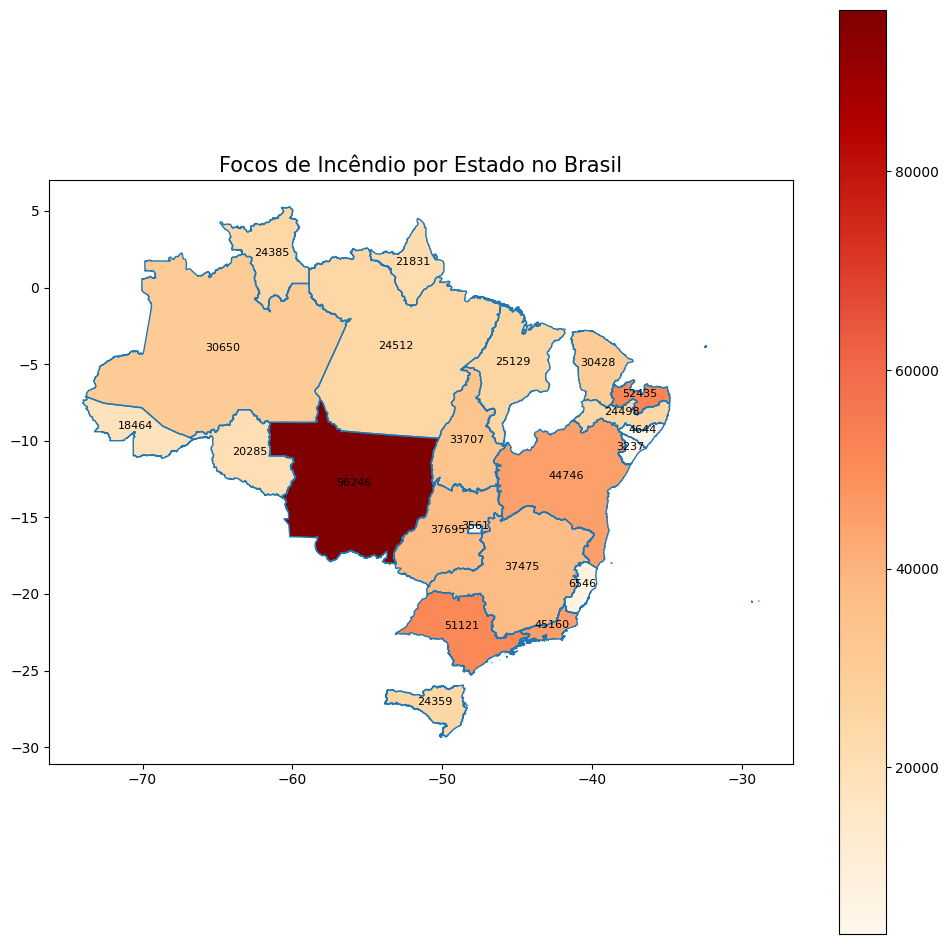

In [ ]:
incendios_por_estado = df.groupby('state')['number'].sum().reset_index()

mapa_brasil = mapa_brasil.merge(incendios_por_estado, left_on='NM_UF', right_on='state')

# Plotar o mapa com os focos de incêndio
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
mapa_brasil.boundary.plot(ax=ax, linewidth=1)

mapa_brasil.plot(column='number', ax=ax, legend=True, cmap='OrRd')

# Adicionar os números de incêndios diretamente no mapa
for x, y, label in zip(mapa_brasil.geometry.centroid.x,
                       mapa_brasil.geometry.centroid.y,
                       mapa_brasil['number']):
    ax.text(x, y, int(label), fontsize=8, ha='center', color='black')

plt.title('Focos de Incêndio por Estado no Brasil', fontsize=15)
plt.show()

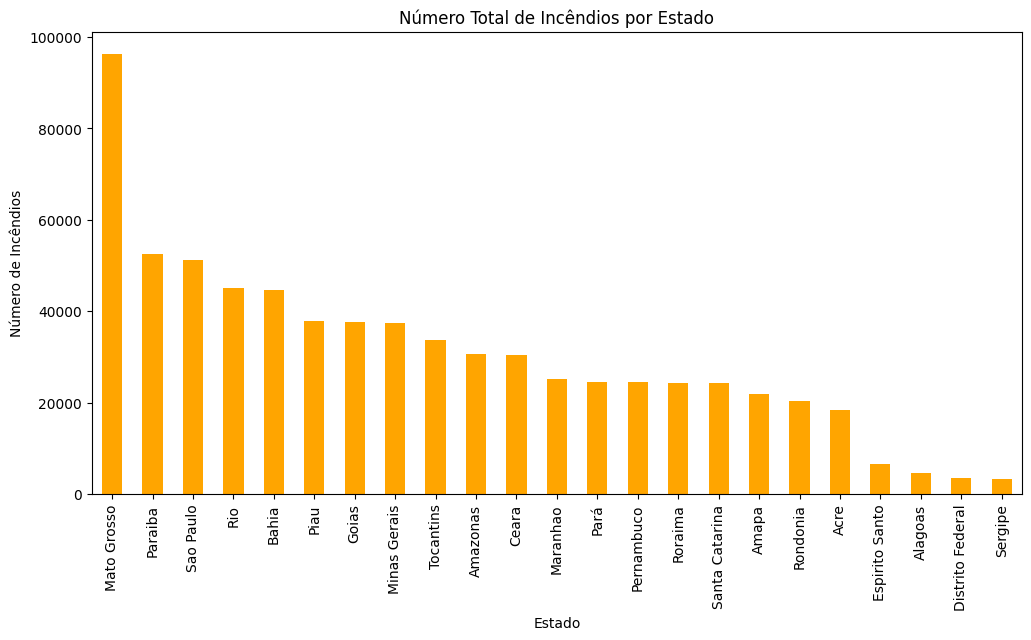

In [ ]:
# Agrupar o número total de incêndios por estado
fires_per_state = df.groupby('state')['number'].sum().sort_values(ascending=False)

# Plotar o número de incêndios por estado
plt.figure(figsize=(12,6))
fires_per_state.plot(kind='bar', color='orange')
plt.title('Número Total de Incêndios por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Incêndios')
plt.xticks(rotation=90)
plt.show()


# **Sazonalidade dos Incêndios**

**A análise da distribuição mensal dos incêndios revela um sazonal claro. A maioria dos incêndios ocorre nos meses de agosto, setembro e outubro, coincidindo com o período de seca no Brasil. Essa estação seca, especialmente no bioma Amazônico, é caracterizada por baixas precipitações, o que facilita a propagação de queimadas, muitas vezes iniciadas por ações humanas. O pico de incêndios em setembro é um dos mais marcantes, refletindo o auge da temporada de seca.**

**Por outro lado, os meses de janeiro a março apresentam os menores registros de incêndios, o que está alinhado com o período chuvoso em grande parte do Brasil. Essa sazonalidade sugere que as iniciativas de controle e prevenção de incêndios devem ser intensificadas durante os meses de seca, quando o risco de propagação de fogo é mais alto.**

**No entanto, os dados mostram que o mês com o maior número de incêndios foi em julho, isso sugere uma variação interessante que merece mais investigação.**

***Mudanças Climáticas e Desvio no Padrão Sazonal:* A ocorrência de mais incêndios em julho pode estar relacionada às mudanças climáticas, que têm alterado os padrões de precipitação e temperaturas. Um período de seca mais prolongado, ou uma estação seca começando mais cedo em algumas regiões, pode explicar o aumento dos incêndios em julho.**

***Atividades Humanas e Expansão Agrícola:* Outra possível razão para o aumento dos incêndios em julho pode ser o aumento de atividades agrícolas e de desmatamento nessa época. Práticas como o uso de fogo para limpar áreas para pastagem ou agricultura podem estar sendo realizadas mais cedo, contribuindo para o aumento das queimadas.**

***Condicionantes Regionais:* Embora agosto a outubro sejam, em geral, os meses mais secos em grande parte do Brasil, pode haver variações regionais. Em algumas áreas, como no Cerrado ou na parte sul da Amazônia, o período de seca pode começar mais cedo, influenciando a distribuição dos incêndios ao longo do ano.**

In [ ]:
# Agrupar os dados por mês e contar o número de registros
month_counts = df.groupby('month')['number'].sum()

sorted_month_counts = month_counts.sort_values()

print(sorted_month_counts)


month
Abril        28188.770
Março        30717.405
Fevereiro    30848.050
Maio         34731.363
Janeiro      47747.844
Junho        56010.675
Dezembro     57535.480
Setembro     58578.305
Novembro     85508.054
Agosto       88050.435
Outubro      88681.579
Julho        92326.113
Name: number, dtype: float64


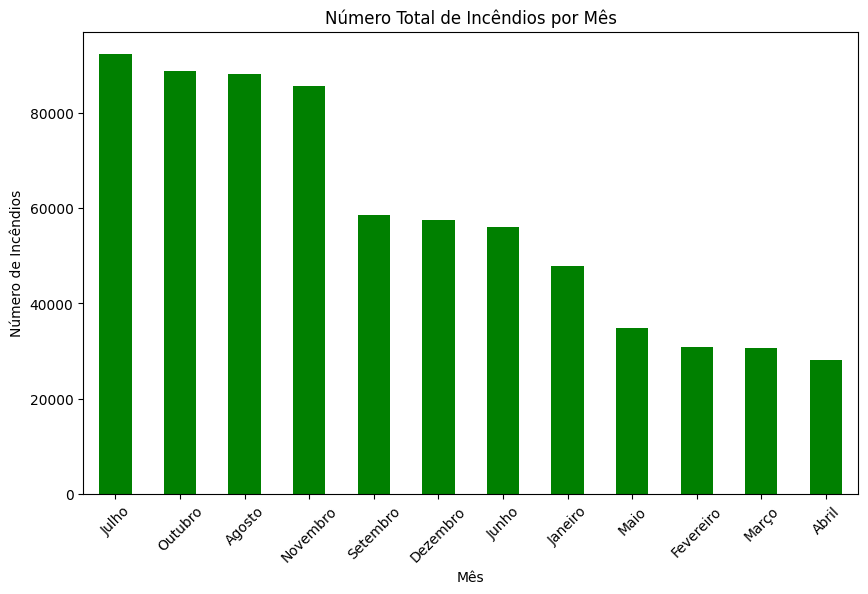

In [ ]:
# Agrupar o número total de incêndios por mês
fires_per_month = df.groupby('month')['number'].sum().sort_values(ascending=False)

# Plotar o número de incêndios por mês
plt.figure(figsize=(10,6))
fires_per_month.plot(kind='bar', color='green')
plt.title('Número Total de Incêndios por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Incêndios')
plt.xticks(rotation=45)
plt.show()


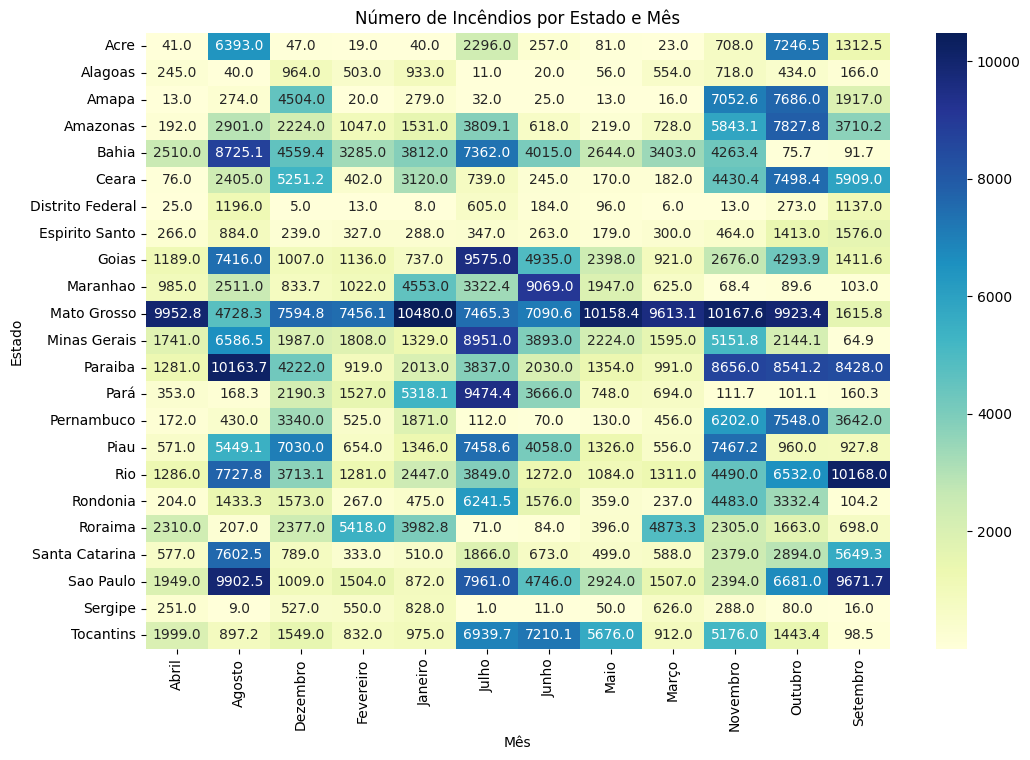

In [ ]:
import seaborn as sns

# Criar uma tabela pivot com estados como linhas e meses como colunas
pivot_table = df.pivot_table(values='number', index='state', columns='month', aggfunc='sum')

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Número de Incêndios por Estado e Mês')
plt.xlabel('Mês')
plt.ylabel('Estado')
plt.show()


<ipython-input-38-33b87e97ebaa>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




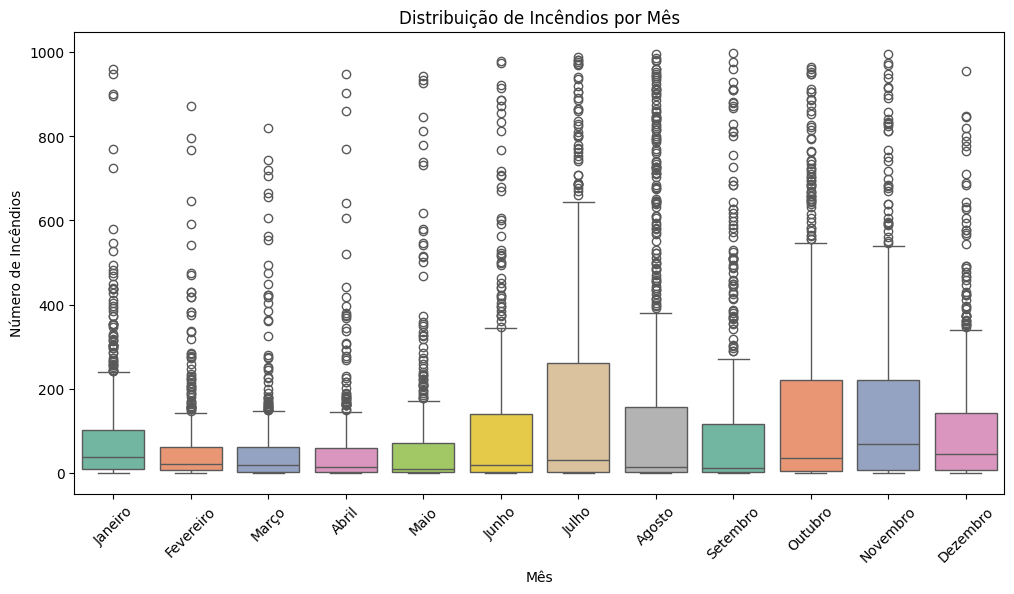

In [ ]:
# Ordenar os meses na ordem correta
months_order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# Plotar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='number', data=df, palette='Set2')
plt.title('Distribuição de Incêndios por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Incêndios')
plt.xticks(rotation=45)
plt.show()


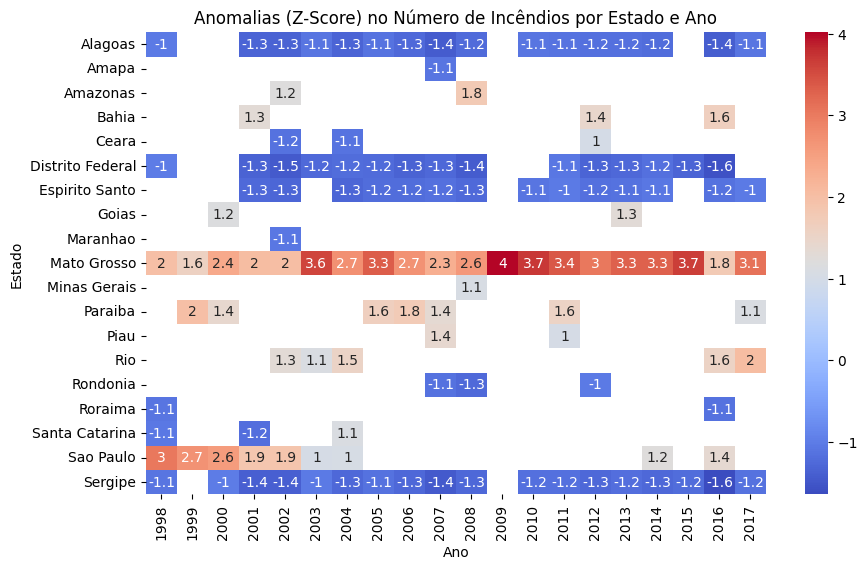

In [ ]:
from scipy.stats import zscore
# Preparar os dados de incêndios por estado
state_fires = df.groupby(['state', 'year'])['number'].sum().unstack().fillna(0)
state_fires_zscore = state_fires.apply(zscore)

# Encontrar anomalias (Z-Score > 2 ou < -2)
anomalies = state_fires_zscore[(state_fires_zscore > 1) | (state_fires_zscore < -1)].dropna(how='all')

# Visualizar as anomalias
plt.figure(figsize=(10, 6))
sns.heatmap(anomalies, annot=True, cmap="coolwarm", cbar=True)
plt.title('Anomalias (Z-Score) no Número de Incêndios por Estado e Ano')
plt.xlabel('Ano')
plt.ylabel('Estado')
plt.show()


# **Algoritmos de aprendizado de máquina**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Certificar-se de que o índice seja o ano
series.index = pd.to_datetime(series.index, format='%Y')

# Criar o modelo ARIMA
model = ARIMA(series, order=(5, 1, 0))  # Parâmetros (p, d, q)
model_fit = model.fit()

# Fazer previsões para os próximos 5 anos
forecast = model_fit.forecast(steps=5)

# Mostrar previsões
print(forecast)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



2018-01-01    36724.408459
2019-01-01    37555.684518
2020-01-01    37121.452265
2021-01-01    36380.151254
2022-01-01    36117.389083
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Modelo SARIMA para incluir sazonalidade
model = SARIMAX(series, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Fazer previsões para os próximos 5 anos
forecast = model_fit.forecast(steps=5)
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



2018-01-01    37126.924804
2019-01-01    35862.324874
2020-01-01    34359.010364
2021-01-01    41808.506611
2022-01-01    40718.874659
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
from sklearn.cluster import KMeans #import the KMeans class from sklearn.cluster


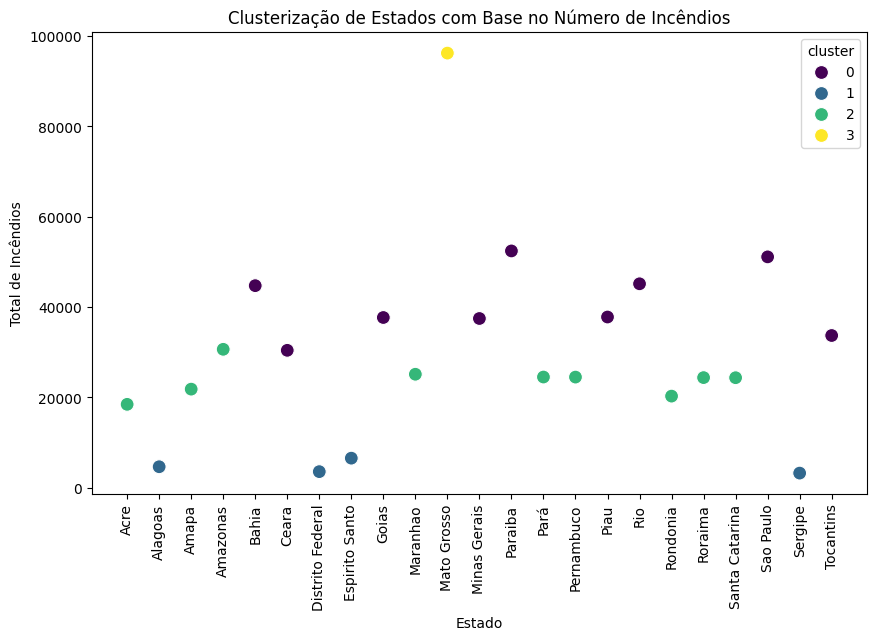

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar o K-Means para encontrar clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(state_fires)

# Adicionar os clusters aos dados originais
state_fires['cluster'] = clusters

# Plotar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=state_fires.index, y=state_fires.sum(axis=1), hue=state_fires['cluster'], palette="viridis", s=100)
plt.title('Clusterização de Estados com Base no Número de Incêndios')
plt.xlabel('Estado')
plt.ylabel('Total de Incêndios')
plt.xticks(rotation=90)
plt.show()
